##### Project 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">1 hour</span>
* A2. Gradient Orientation: <span style="color:red;">1 hour</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">1 hour</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">1 hour</span>
* B. Hough Transform (Circles):  <span style="color:red;">7 hours</span>

Total around 11 hours.

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy import ndimage


#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

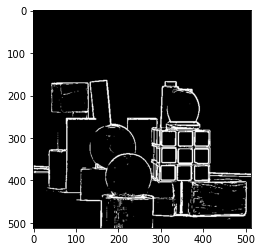

In [2]:
# Part 1. Compute the Gradient Magnitude
box = plt.imread("2D_White_Box.png")
blocks = plt.imread("blocks.png", format="png")

def get_gradient_mag(img):
    x_kernel = np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]])

    y_kernel = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])
    x_convolve = ndimage.convolve(img, x_kernel)
    y_convolve = ndimage.convolve(img, y_kernel)
    grad_mag = np.hypot(x_convolve, y_convolve)

    return grad_mag

# Show your results on the blocks image
grad_mag_blocks = get_gradient_mag(blocks)
threshold = 0.3
grad_mag_blocks[grad_mag_blocks < threshold] = 0
grad_mag_blocks[grad_mag_blocks > threshold] = 255
plt.imshow(grad_mag_blocks, cmap="gray")
plt.show()

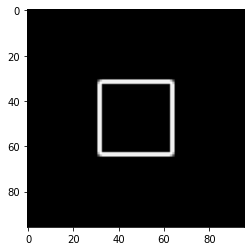

In [30]:
grad_mag_box = get_gradient_mag(box)
plt.imshow(grad_mag_box, cmap="gray")
plt.show()


<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

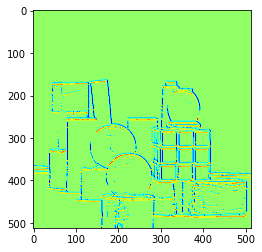

In [3]:
def get_gradient_ori(img):
    x_kernel = np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]])

    y_kernel = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])

    x_convolve = ndimage.convolve(img, x_kernel)
    y_convolve = ndimage.convolve(img, y_kernel)
    grad_ori = np.arctan2(y_convolve, x_convolve)
    return -grad_ori

# Part 2. Compute the Gradient Orientation
angle_grad_box = get_gradient_ori(box)
angle_grad_blocks = get_gradient_ori(grad_mag_blocks)

# Show your results on the blocks image
plt.imshow(angle_grad_blocks, cmap="jet")
plt.show()

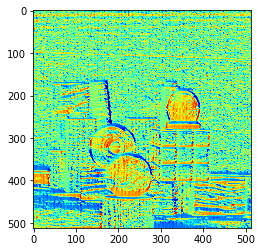

In [143]:
angle_grad_blocks = get_gradient_ori(blocks)

# Show your results on the blocks image
plt.imshow(angle_grad_blocks, cmap="jet")
plt.show()

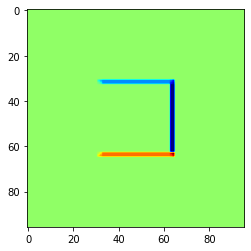

In [144]:
plt.imshow(angle_grad_box, cmap="jet")
plt.show()

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



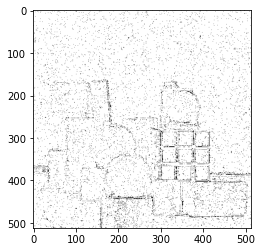

In [4]:
def get_laplacian(img):
    lap_kernel = np.array([[0,-1,0],
                          [-1,4,-1],
                          [0,-1,0]])

    lap = ndimage.convolve(img, lap_kernel)
    #return lap
    lap[lap < 0] = 0
    lap[lap > 0] = 1
    padded_lap_copy = np.pad(lap, (1, 1), 'constant', constant_values = 0)
    crossings_right = np.logical_xor(lap, padded_lap_copy[1:-1, :-2])
    crossings_left = np.logical_xor(lap,  padded_lap_copy[1:-1, 2:])
    crossings_up = np.logical_xor(lap, padded_lap_copy[:-2, 1:-1])
    crossings_down = np.logical_xor(lap, padded_lap_copy[2:, 1:-1])
    crossings = np.logical_or(crossings_right, crossings_left)
    crossings = np.logical_or(crossings, crossings_up)
    crossings = np.logical_or(crossings, crossings_down)

    return crossings

# Part 3. Find the Zero Crossings
lap = get_laplacian(blocks)
# Show the results on blocks image
plt.imshow(lap, cmap="gray")
plt.show()

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


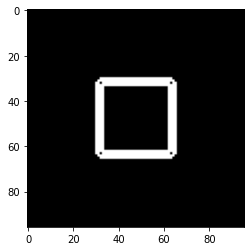

In [328]:
grad_mag = get_gradient_mag(box)
lap_grad_mag = get_laplacian(grad_mag)

threshold = 0
lap_grad_mag[lap_grad_mag < threshold] = 0
lap_grad_mag[lap_grad_mag > threshold] = 255

# Show the results on blocks image
plt.imshow(lap_grad_mag, cmap="gray")
plt.show()

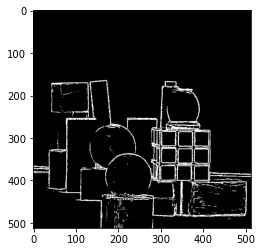

In [5]:
# Part 4. Final Solution
grad_mag = get_gradient_mag(blocks)
threshold = 0.3
grad_mag[grad_mag < threshold] = 0
grad_mag[grad_mag > threshold] = 255

lap = get_laplacian(blocks)
res = np.logical_and(grad_mag, lap)

# Show the results on blocks image
plt.imshow(res, cmap="gray")
plt.show()

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
What are the advantages and disadvantages of using Laplace kernels vs the gradient magnitude? It seems like the gradient magnitude method did better for me. I also noticed that for gradient orientation, it had a much better output when I fed it the gradient magnitude image instead of the original image.


<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

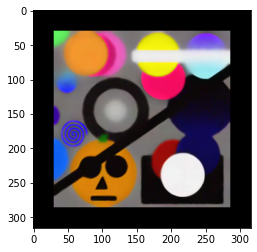

In [6]:
import cv2

circles = cv2.imread('circles.png')
circles = cv2.fastNlMeansDenoisingColored(circles, None, 40, 20, 7, 21)
circles = cv2.cvtColor(circles, cv2.COLOR_BGR2RGB).astype('float32') / 255
circles = np.pad(circles, pad_width=[(30, 30),(30, 30),(0, 0)], mode='constant', constant_values = 0)
plt.imshow(circles)

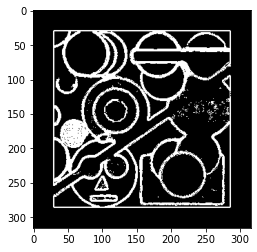

In [7]:
"""
Do edge detection on each channel
Subtract channels from each other to find edges
"""

# Part B - Hough Transform - code below
circle = plt.imread("simplecircle.png")

def get_nonzero_indices(img):
    nonzeros = np.transpose(np.nonzero(img))
    return nonzeros

def accum(img):
    return [0]

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(-int(y), int(x))

def circle_vote(radius, theta, row, col):
    ctr_votes1 = [pol2cart(radius, theta + i*0.02) for i in range(-20, 20)]
    ctr_votes2 = [pol2cart(-radius, theta + i*0.02) for i in range(-20, 20)]

    votes = [[row + p[0], col + p[1]] for p in ctr_votes1] +\
            [[row + p[0], col + p[1]] for p in ctr_votes2]
    
    return votes

def hough_trans(img):
    
    img_channels = [img[:, :, i] for i in range(3)]
    grad_channels = [get_gradient_mag(channel) for channel in img_channels]
    lap_channels = [get_laplacian(channel) for channel in img_channels]
    combined_grads = sum(grad_channels)
    combined_laps = sum(lap_channels)
    
    threshold = 0.6
    combined_grads[combined_grads < threshold] = 0
    combined_grads[combined_grads > threshold] = 1
    
    res = np.logical_and(combined_grads, combined_laps)
    rows, cols = res.shape
    plt.imshow(res, cmap="gray")

    grad_ori = get_gradient_ori(combined_grads)
    #plt.imshow(grad_ori, cmap="jet")
    accum16 = np.zeros_like(img)
    accum32 = np.zeros_like(img)
    accum48 = np.zeros_like(img)
    
    for pair in get_nonzero_indices(res):
        for radius in [16, 32, 48]:
            x, y = pair[0], pair[1]
            theta = grad_ori[x, y]
            circle_ctr_votes = circle_vote(radius, theta, x, y)
            for vote in circle_ctr_votes:
                row, col = vote[0], vote[1]
                if row < 0 or col < 0 or row >= rows or col >= cols:
                    continue
                if radius == 16:
                    accum16[row, col] += 1
                if radius == 32:
                    accum32[row, col] += 1
                if radius == 48:
                    accum48[row, col] += 1
    return accum16 / 255, accum32 / 255, accum48 / 255

a16, a32, a48 = hough_trans(circles)
# Be sure to show all of the figures required in the description above


In [138]:
a16_cp = a16.copy()
a32_cp = a32.copy()
a48_cp = a48.copy()

In [9]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(-int(y), int(x))

def draw_circle(row, col, radius):
    circle_pts = [pol2cart(radius, 2 * np.pi * i/360) for i in range(360)]
    adjusted_ctr = [[row + p[0], col + p[1]] for p in circle_pts]
    return adjusted_ctr
    

hello
hello
hello
hello
hello
hello
hello


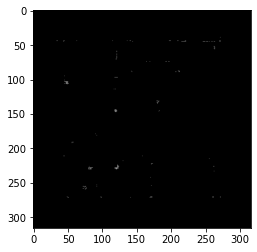

In [65]:
def kill_spiral(img, box_size = 40, concentration = 120):
    rows, cols, channels = img.shape
    left = 0
    up = 0
    
    for col in range(cols - box_size):
        for row in range(rows - box_size):
            box0_count = np.count_nonzero(img[(col + left):(col + left + box_size),
                                              (row + up):(row + up + box_size), 0])
            box1_count = np.count_nonzero(img[(col + left):(col + left + box_size),
                                              (row + up):(row + up + box_size), 1])
            box2_count = np.count_nonzero(img[(col + left):(col + left + box_size),
                                              (row + up):(row + up + box_size), 2])
            box_total = box0_count + box1_count + box2_count
            if box_total >= concentration:
                img[(col + left):(col + left + box_size), (row + up):(row + up + box_size)] = 0
    return img
    
threshold = 0.30
a16_cp[a16_cp < threshold] = 0
a16_cp = kill_spiral(a16_cp)


plt.imshow(a16_cp, cmap="gray")
args_ranked = np.argsort(np.ravel(a16_cp))[::-1][:85]
indices = [np.unravel_index(arg, a16_cp.shape)[:-1] for arg in args_ranked]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(229, 120), (146, 119), (106, 49), (230, 83)]


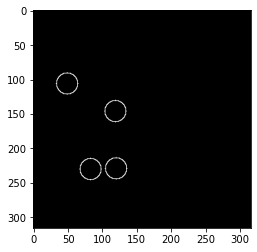

In [67]:
a16_ctrs = []
a16_circles = np.zeros_like(a16_cp)
rows, cols, cs = a16_circles.shape
radius = 16

for index in indices:
    too_close = False
    for ctr in a16_ctrs:
        if np.linalg.norm(np.array([index[0], index[1]]) - np.array([ctr[0], ctr[1]])) < 5:
            too_close = True
            break
    if too_close:
        continue
    a16_ctrs.append(index)
    row = index[0]
    col = index[1]
    circle_pts = draw_circle(row, col, radius)
    for pt in circle_pts:
        row = pt[0]
        col = pt[1]
        if row < 0 or row >= rows or col < 0 or col >= cols:
            continue
        a16_circles[row, col] += 1
plt.imshow(a16_circles, cmap="gray")
print(a16_ctrs)


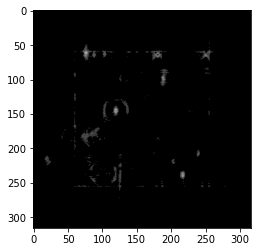

In [75]:
threshold = 0.2
a32_cp[a32_cp < threshold] = 0
plt.imshow(a32_cp, cmap="gray")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(61, 76), (144, 120), (240, 217), (97, 188), (66, 250), (65, 178), (64, 105), (209, 239), (221, 203), (66, 87)]


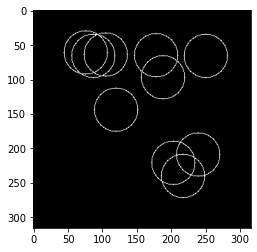

In [164]:
a32_ctrs = []
a32_circles = np.zeros_like(a32_cp)
rows, cols, cs = a32_circles.shape
radius = 32

args_ranked = np.argsort(np.ravel(a32_cp))[::-1][:450]
indices = [np.unravel_index(arg, a32_cp.shape)[:-1] for arg in args_ranked]
# print(indices)

for index in indices:
    too_close = False
    for ctr in a32_ctrs:
        if np.linalg.norm(np.array([index[0], index[1]]) - np.array([ctr[0], ctr[1]])) < 10:
            too_close = True
            break
    if too_close:
        continue
    a32_ctrs.append(index)
    row = index[0]
    col = index[1]
    circle_pts = draw_circle(row, col, radius)
    for pt in circle_pts:
        row = pt[0]
        col = pt[1]
        if row < 0 or row >= rows or col < 0 or col >= cols:
            continue
        a32_circles[row, col] += 1
plt.imshow(a32_circles, cmap="gray")
print(a32_ctrs)

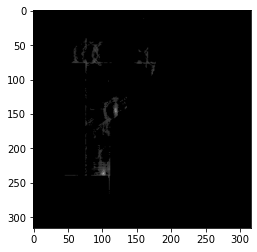

In [150]:
def a48_filter(img, box_size = 40, concentration = 120):
    rows, cols, channels = img.shape
    left = 0
    up = 0
    
    for col in range(cols - box_size):
        for row in range(rows - box_size):
            box0_count = np.count_nonzero(img[(col + left):(col + left + box_size),
                                              (row + up):(row + up + box_size), 0])
            box1_count = np.count_nonzero(img[(col + left):(col + left + box_size),
                                              (row + up):(row + up + box_size), 1])
            box2_count = np.count_nonzero(img[(col + left):(col + left + box_size),
                                              (row + up):(row + up + box_size), 2])
            box_total = box0_count + box1_count + box2_count
            if box_total < concentration:
                img[(col + left):(col + left + box_size), (row + up):(row + up + box_size)] = 0
    return img

a48_cp = a48.copy()
threshold = 0.15
a48_cp[a48_cp < threshold] = 0
a48_cp = a48_filter(a48_cp,box_size = 70, concentration = 50)

plt.imshow(a48_cp, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(236, 102), (147, 119)]


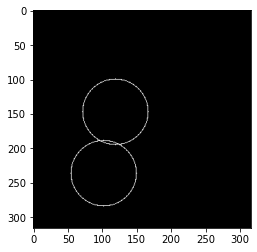

In [154]:


a48_ctrs = []
a48_circles = np.zeros_like(a48_cp)
rows, cols, cs = a48_circles.shape
radius = 48

args_ranked = np.argsort(np.ravel(a48_cp))[::-1][:105]
indices = [np.unravel_index(arg, a48_cp.shape)[:-1] for arg in args_ranked]
# print(indices)

for index in indices:
    too_close = False
    for ctr in a48_ctrs:
        if np.linalg.norm(np.array([index[0], index[1]]) - np.array([ctr[0], ctr[1]])) < 20:
            too_close = True
            break
    if too_close:
        continue
    a48_ctrs.append(index)
    row = index[0]
    col = index[1]
    circle_pts = draw_circle(row, col, radius)
    for pt in circle_pts:
        row = pt[0]
        col = pt[1]
        if row < 0 or row >= rows or col < 0 or col >= cols:
            continue
        a48_circles[row, col] += 1
plt.imshow(a48_circles, cmap="gray")

print(a48_ctrs)

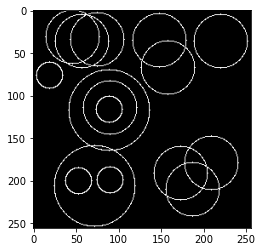

In [165]:
def color2gray(image):
    result = .29*image[:, :, 0] + 0.587*image[:, :, 1] + .114*image[:, :, 2]
    return result

# Logical or all the circles pics together:
res = np.logical_or(color2gray(a16_circles), color2gray(a32_circles))
res = np.logical_or(res, color2gray(a48_circles))
plt.imshow(res[30:-30, 30:-30], cmap="gray")

##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

Results were not too bad!I couldn't get any of the circles on the edge nor the large circle that blends with other nearby edges so it's difficult to see the full circle from the gradient magnitude filter. I did not hardcode anything in terms of location of an image but I had to tune some knobs for accumulators and the accumulator "readers" to get the best results for different radii of circles. For example, to avoid reading the spiral I made a box of about 30 by 30 pixels, ran it thru the accumulator img for the small circles to see if at any point there were too many nonzero points in a spread out fashion (which is what the spiral looks like on the accumulator). When I found that, I zero'd out that portion of the image so that only the more precise points were discovered. Another thing I did to reduce noise was make a threshold of a certain pixel value where all pixels below that value got zero'd out as well so that they were not discovered when I found the argmax indices on the accumulator images. If I had more time, I would have done more sophisticated weighting of of accumulator votes to be stronger towards the opposites of the gradient orientation and get weaker as the circle continues. I just did equal vote strength for about 20 degrees of the circle on the opposite sides of the gradient orientation. Tough lab! 

In [168]:
A = np.arange(9).reshape((3,3))
print(A)
print(np.sum(A))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
36


In [172]:
B = A-2.3*A

(2, 10000)
[[-3.45165152 -3.45165152 -3.45165152 ...  3.70821059  3.70821059
   3.70821059]
 [-4.00404623 -3.91860265 -3.83315906 ...  4.28398122  4.36942481
   4.45486839]]
(2, 2000)
[[-0.96148268  2.22172129 -0.43469939 ...  0.34560395 -0.09422468
   0.31520124]
 [-0.93129349  2.49356378 -2.36213169 ...  0.97437762 -0.59063912
   0.14116695]]
(10000,)
[0.00025684 0.00038873 0.00053195 ... 0.00024602 0.00037043 0.00050669]


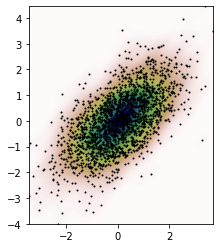

In [178]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
print(positions.shape)
print(positions)
values = np.vstack([m1, m2])
print(values.shape)
print(values)
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
print(kernel(positions).T.shape)
print(kernel(positions).T)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [184]:
def good_gift(gift):
    if gift == 'mug':
        print("Meh, " + str(gift) + 's are too basic')
    elif gift == 'scarf':
        print("Great idea, but Torrey doesn't like " + str(gift) + 's')
    else:
        print("Great idea! Give Torrey a " + str(gift))

In [185]:
good_gift('scarf')

Great idea, but Torrey doesn't like scarfs
